In [ ]:
Disusun oleh:
Atya Azharina Aziz (24031554194) 
Kelas: 2024 D
Kelompok: 18

In [ ]:
df_aps = pd.read_csv(
    'C:/Users/atyaa/OneDrive/Pictures/MAIN/SEM 3/UAS.DW/raw_data/Angka Partisipasi Sekolah (APS)^J 2024.csv',
    sep=';'
)

df_aps['kab_full'] = df_aps['Kabupaten/Kota Se Jawa Timur']

df_aps['APS'] = (
    df_aps['Angka Partisipasi Sekolah (APS) (Persen)']
    .astype(str)
    .str.replace(',', '.')
    .astype(float)
)

df_aps = df_aps[['kab_full', 'APS']]
df_aps.head(40)


,kab_full,APS
0,Kabupaten Pacitan,99.55
1,Kabupaten Ponorogo,98.47
2,Kabupaten Trenggalek,99.38
3,Kabupaten Tulungagung,99.60
4,Kabupaten Blitar,99.53
5,Kabupaten Kediri,99.99
6,Kabupaten Malang,99.61
7,Kabupaten Lumajang,97.87
8,Kabupaten Jember,98.83
9,Kabupaten Banyuwangi,99.61


In [28]:
df_aps.to_csv(
    'C:/Users/atyaa/OneDrive/Pictures/MAIN/SEM 3/UAS.DW/project_wrangle/processed_data/aps_clean.csv',
    index=False
)


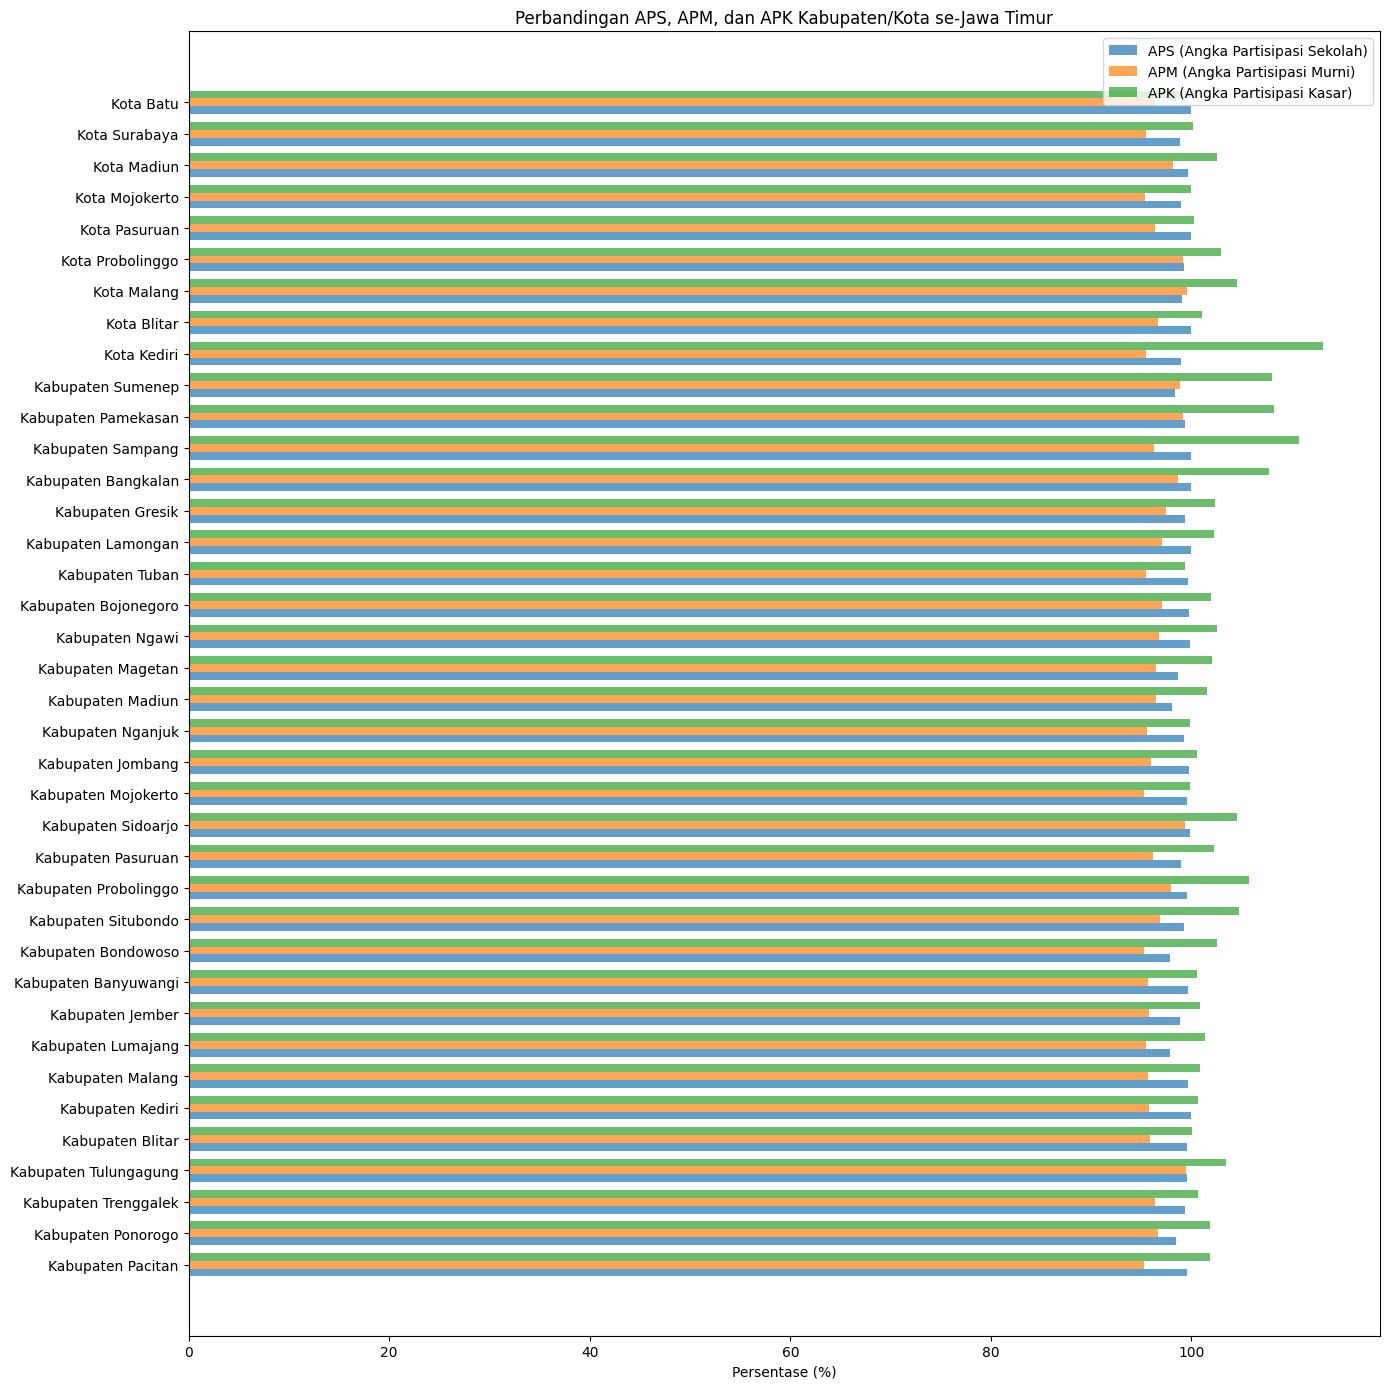

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_apk = pd.read_csv("C:/Users/atyaa/OneDrive/Pictures/MAIN/SEM 3/UAS.DW/project_wrangle/processed_data/jatim_merged_final.csv")
df_aps = pd.read_csv("C:/Users/atyaa/OneDrive/Pictures/MAIN/SEM 3/UAS.DW/project_wrangle/processed_data/aps_clean.csv")

df_apk['wilayah'] = df_apk['kabupaten_/_kota'].str.replace('Kab. ', 'Kabupaten ', regex=False)
df_aps['wilayah'] = df_aps['kab_full']
df_merge = df_apk.merge(df_aps[['wilayah','APS']], on='wilayah', how='left')

aps_vals = df_merge['APS']
apm_vals = df_merge['angka_partisipasi_murni_2024']
apk_vals = df_merge['angka_partisipasi_kasar_2024']
labels = df_merge['wilayah']

y_pos = np.arange(len(labels))
bar_height = 0.25

plt.figure(figsize=(14, 14))

plt.barh(y_pos - bar_height, aps_vals, height=bar_height, 
         label='APS (Angka Partisipasi Sekolah)', alpha=0.7)

plt.barh(y_pos, apm_vals, height=bar_height, 
         label='APM (Angka Partisipasi Murni)', alpha=0.7)

plt.barh(y_pos + bar_height, apk_vals, height=bar_height, 
         label='APK (Angka Partisipasi Kasar)', alpha=0.7)

plt.yticks(y_pos, labels)
plt.xlabel("Persentase (%)")
plt.title("Perbandingan APS, APM, dan APK Kabupaten/Kota se-Jawa Timur")
plt.legend()
plt.tight_layout()
plt.show()
